In [1]:
import json
import graphviz
import pydotplus
import pandas as pd
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import accuracy_score

In [2]:
melon_data = pd.read_csv("./melon_data.csv",index_col = 0)

with open("./melon_data_dic.json", 'r') as f:
    dic = json.loads(f.read())

In [3]:
melon_data

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


In [4]:
# one-hot coder
for f in melon_data.columns[0:6]:
    melon_data[f] = melon_data[f].map(dic)
    dummies = pd.get_dummies(melon_data[f], prefix=dic[f])
    melon_data = melon_data.join(dummies)

In [5]:
#melon_data[dic["密度"]]=melon_data["密度"].apply(float)
#melon_data[dic["含糖率"]]=melon_data["含糖率"].apply(float)
melon_data[dic["好瓜"]]=melon_data["好瓜"].map(dic)
melon_data = melon_data.drop(["色泽", "根蒂", "敲声","纹理","脐部","触感","密度","含糖率","好瓜"], axis=1)

In [6]:
train_set = melon_data.iloc[[i-1 for i in range(1,19,2)],:]
vali_set = melon_data.iloc[[i-1 for i in range(2,18,2)],:]

In [7]:
# train a clf
clf = tree.DecisionTreeClassifier()
clf_fit = clf.fit(train_set.drop(["target"], axis=1), train_set["target"])

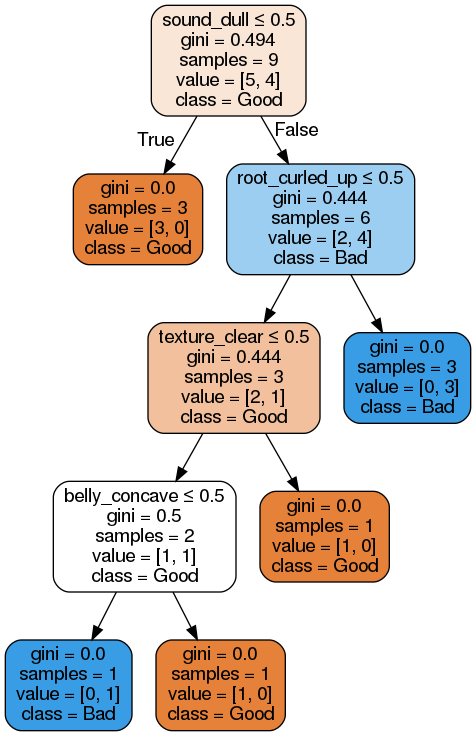

In [8]:
# plot it！
dot_data = tree.export_graphviz(
    clf_fit,
    out_file=None,
    feature_names=melon_data.columns[:-1],
    class_names=[u"Good", u"Bad"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [9]:
accuracy_score(clf.predict(vali_set.drop(["target"], axis=1)),vali_set["target"])

0.25

### 剪枝
#### 后剪枝

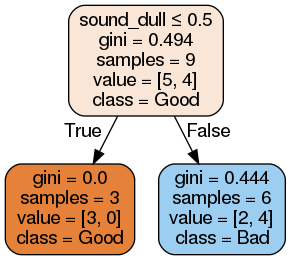

In [10]:
# train a clf
clf = tree.DecisionTreeClassifier(max_depth=1)
clf_fit = clf.fit(train_set.drop(["target"], axis=1), train_set["target"])

# plot it！
dot_data = tree.export_graphviz(
    clf_fit,
    out_file=None,
    feature_names=melon_data.columns[:-1],
    class_names=[u"Good", u"Bad"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
accuracy_score(clf.predict(vali_set.drop(["target"], axis=1)),vali_set["target"])

0.5

#### 预剪枝

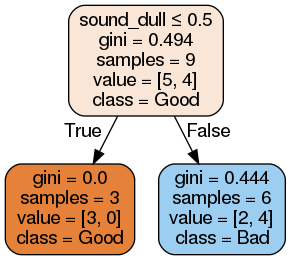

In [12]:
# train a clf
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.15)
clf_fit = clf.fit(train_set.drop(["target"], axis=1), train_set["target"])

# plot it！
dot_data = tree.export_graphviz(
    clf_fit,
    out_file=None,
    feature_names=melon_data.columns[:-1],
    class_names=[u"Good", u"Bad"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [13]:
accuracy_score(clf.predict(vali_set.drop(["target"], axis=1)),vali_set["target"])

0.5